# Robot Simulation

In [1]:
import jyro.simulator as jy
import random
import numpy as np

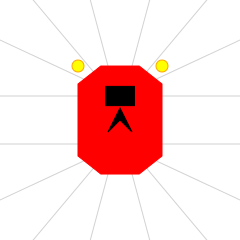

In [2]:
robot = jy.Pioneer("Pioneer", 3.5, 2, 0)
robot.addDevice(jy.Pioneer16Sonars())
robot.addDevice(jy.DepthCamera(4))
light_sensors = jy.PioneerFrontLightSensors(3.0)
light_sensors.lightMode = 'ambient'
robot.addDevice(light_sensors)

In [3]:
def worldf(physics):
    physics.addBox(0, 0, 4, 4, fill="backgroundgreen", wallcolor="gray")
    physics.addLight(2, 0.75, 1.0) # increased brightness for new linear version of lights

In [4]:
sim = jy.VSimulator(robot, worldf)

In [5]:
camera = robot.device["camera"]

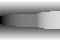

In [6]:
image = camera.getImage()
image

In [7]:
image.size

(60, 40)

In [8]:
data = camera.getData()
data.shape

(40, 60, 3)

In [9]:
robot.move(0.50, 0.35)

In [10]:
sim.step()

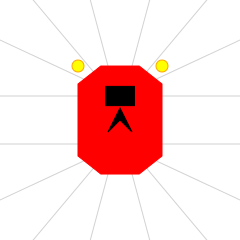

In [11]:
robot = jy.Pioneer("Pioneer", 3.5, 2, 0)
robot.addDevice(jy.Pioneer16Sonars())
robot.addDevice(jy.Camera())
light_sensors = jy.PioneerFrontLightSensors(3.0)
light_sensors.lightMode = 'ambient'
robot.addDevice(light_sensors)

In [12]:
sim = jy.VSimulator(robot, worldf)

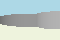

In [13]:
camera = robot.device["camera"]
image = camera.getImage()
image

In [14]:
data = camera.getData()
data.shape

(40, 60, 3)

In [15]:
def random_action():
    """Generate a random action from a limited set of possible settings"""
    possible = [-1.0, -0.5, 0.0, 0.5, 1.0]
    return [random.choice(possible), random.choice(possible)]

def get_senses(robot):
    light = robot["light"].getData()
    sonar = [v/3.0 for v in robot["sonar"].getData()]
    camera = robot["camera"].getData()
    return [light, sonar, camera]

In [16]:
senses = get_senses(robot)
list(map(len, senses))

[2, 16, 40]

In [17]:
robot.history = []

def brain(robot):
    senses = get_senses(robot)
    net.propagate(senses)
    translate, rotate = random_action()
    #self.move(translate, rotate)
    robot.history.append(robot.getPose())
    robot.move(0.50, 0.35)

In [18]:
robot.brain = brain

In [19]:
import conx as cx

Using TensorFlow backend.
ConX, version 3.7.4


In [20]:
net = cx.Network("Robot Prediction Network")

net.add(cx.Layer("light", 2),
        cx.Layer("sonar", 16),
        cx.ImageLayer("camera", (40,60), 3),
        cx.FlattenLayer("flatten"),
        cx.Conv2DLayer("conv", 16, (3,3), keep_aspect_ratio=True),
        cx.Layer("hidden", 50, activation="relu"),
        cx.Layer("output1", 2, activation="sigmoid"),
        cx.Layer("hidden2", 5, activation="sigmoid"),
        cx.Layer("hidden3", 10, activation="sigmoid", dropout=0.25),
        cx.Layer("hidden4", 10, activation="sigmoid"),
        cx.Layer("output2", 5, activation="sigmoid"))

'output2'

In [21]:
net.connect("sonar", "hidden2")
net.connect("light", "hidden")
net.connect("camera", "conv")
net.connect("conv", "flatten")
net.connect("flatten", "hidden2")
net.connect("hidden", "hidden2")
net.connect("hidden2", "hidden3")
##net.connect("hidden2", "output2")
net.connect("hidden3", "output2")
net.connect("hidden3", "hidden4")
net.connect("hidden4", "output1")

In [22]:
net.compile(error="mean_squared_error", optimizer="adam")

In [23]:
cx.maximum(get_senses(robot))

1.2321053632934627


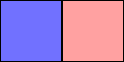
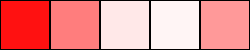
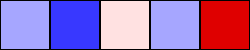
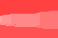
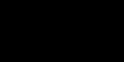
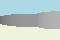

In [24]:
net.picture(get_senses(robot), hspace=200, scale=1)


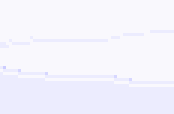
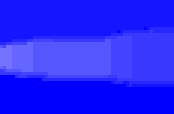
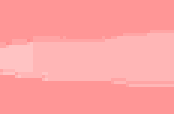
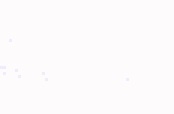
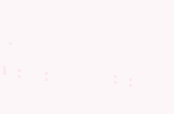
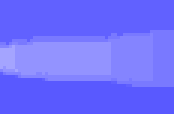
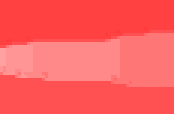
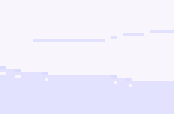
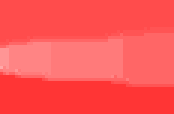
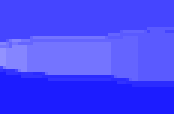
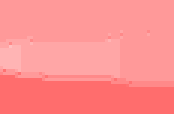
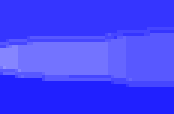
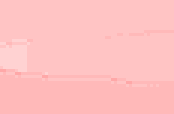
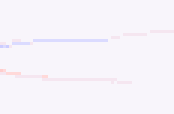
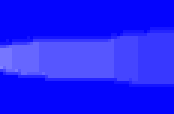
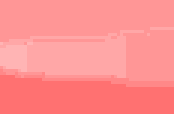

In [25]:
net.propagate_to_features("conv", get_senses(robot), scale=3)

In [28]:
net.dataset.append([[1] * 2, [1] * 16, data], [[1] * 2, [1] + ([1] * 4)])

In [27]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, …


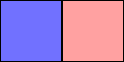
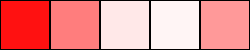
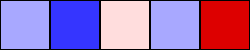
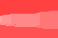
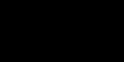
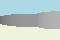

In [29]:
net.picture()

In [34]:
net.test()

Testing validation dataset with tolerance 0.1...
Total count: 1
      correct: 0
      incorrect: 1
Total percentage correct: 0.0


In [31]:
#net.delete()
#net.reset()

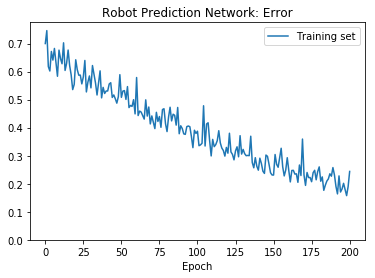

In [35]:
if net.saved():
    net.load()
    net.plot_results()
else:
    net.train(epochs=200)
    net.save()

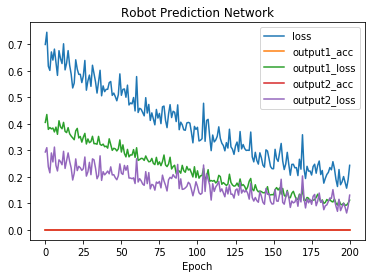

In [36]:
net.plot("all")

In [37]:
net.test(show=True)

Testing validation dataset with tolerance 0.1...
# | inputs | targets | outputs | result
---------------------------------------
0 | [[0.00, 0.00],[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],[[[0.68, 0.85, 0.90],  [0.68, 0.85, 0.90],  [0.68, 0.85, 0.90],  ...,  [0.68, 0.85, 0.90],  [0.68, 0.85, 0.90],  [0.68, 0.85, 0.90]], [[0.68, 0.85, 0.90],  [0.68, 0.85, 0.90],  [0.68, 0.85, 0.90],  ...,  [0.68, 0.85, 0.90],  [0.68, 0.85, 0.90],  [0.68, 0.85, 0.90]], [[0.68, 0.85, 0.90],  [0.68, 0.85, 0.90],  [0.68, 0.85, 0.90],  ...,  [0.68, 0.85, 0.90],  [0.68, 0.85, 0.90],  [0.68, 0.85, 0.90]], ..., [[0.93, 0.95, 0.87],  [0.93, 0.95, 0.87],  [0.93, 0.95, 0.87],  ...,  [0.93, 0.95, 0.87],  [0.93, 0.95, 0.87],  [0.93, 0.95, 0.87]], [[0.93, 0.95, 0.87],  [0.93, 0.95, 0.87],  [0.93, 0.95, 0.87],  ...,  [0.93, 0.95, 0.87],  [0.93, 0.95, 0.87],  [0.93, 0.95, 0.87]], [[0.93, 0.95, 0.87],  [0.93, 0.95, 0.87],  [0.93, 0.95, 0.87],  ...,  [0.93, 0.95, 0.

In [35]:
for i in range(100):
    sim.step()

In [36]:
def function(simulator, index):
    cam_image = simulator.get_image()
    return (simulator.canvas.render("pil"),
            cam_image.resize((cam_image.size[0] * 4,
                              cam_image.size[1] * 4)))

SequenceViewer(children=(VBox(children=(HBox(children=(IntSlider(value=0, continuous_update=False, description='Jyro Playback', layout=Layout(width='100%'), max=99, style=SliderStyle(description_width='initial')), Label(value='of 100', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='100%')), Output()))

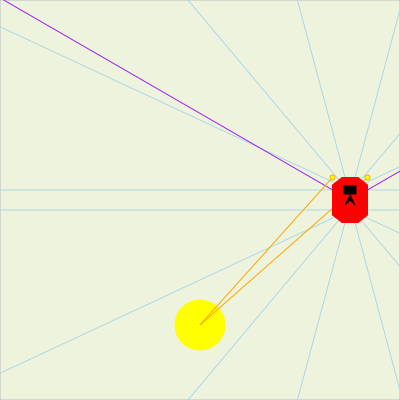

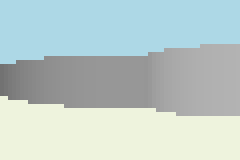

In [37]:
sim.playback(robot.history, function)

In [38]:
def function(simulator, index):
    cam_image = simulator.get_image()
    return simulator.canvas.render("pil")

In [40]:
sim.movie(robot.history, function, movie_name="sim-robot.gif")